In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr
import pywt
import os  


In [45]:
# img = cv2.imread('D:\\\\Coding\\\\projects\\\\DeepLearning\\\\ID_system\\\\image_identi\\\\students_data\\\\cedric\\\\01.jpg')
img = cv2.imread("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\hermione\\72c5b359f2e4c173d20074e9cdc874e14.jpg")


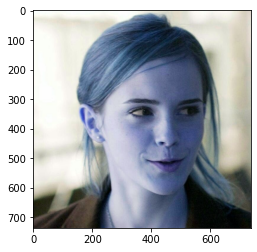

In [46]:
plt.imshow(img)

In [5]:
data_dir='students_data'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
import os

In [8]:
for image_class in os.listdir(data_dir): 
    print(image_class)

cedric
draco
harry
hermione
ron


removing imgages of wrong type

In [187]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

KeyboardInterrupt: 

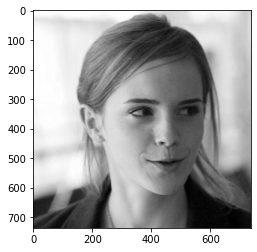

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [14]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [48]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[210, 165, 457, 457]])

In [49]:
(x,y,w,h) = faces[0]
x,y,w,h

(210, 165, 457, 457)

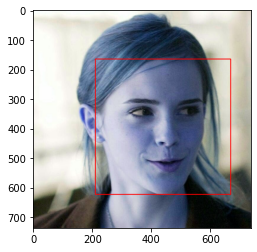

In [50]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

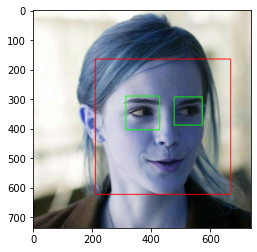

In [51]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

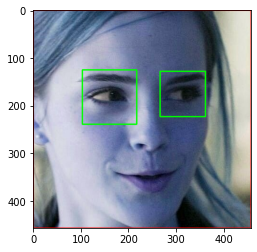

In [52]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [23]:
cropped_img = np.array(roi_color)
cropped_img.shape

(67, 67, 3)

cropping the images


In [67]:
#get images if the cropped img has eyes
def get_cropped(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color 
            

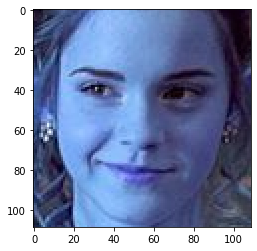

In [198]:
# char_name='cedric'
# entry='01.jpg'
cropped_image = get_cropped("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\hermione\\afa7d40c49ab710c8951669e07f452ec.jpg")
# cropped_image = get_cropped('students_data'+'\\\\'+char_name+'\\\\'+entry)
plt.imshow(cropped_image)

In [53]:
data_path="D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data"
cropped_path="D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped"

In [109]:
print(data_path)

D:\Coding\projects\DeepLearning\ID_system\image_identi\students_data


In [61]:
import os
img_dirs = []

for entry in os.listdir(data_path):
    print(entry)
    e_path=os.path.join(data_path,entry)
    img_dirs.append(e_path)


cedric
draco
harry
hermione
ron


In [75]:
import shutil
if os.path.exists(cropped_path):
     shutil.rmtree(cropped_path)
os.mkdir(cropped_path)

In [76]:
cropped_image_dirs = []
character_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    character_name = img_dir.split('\\')[-1]
    character_file_names_dict[character_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped(entry.path)
        if roi_color is not None:
            cropped_folder = cropped_path +'\\'+ character_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
            cropped_image_dirs.append(cropped_folder)
            print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = character_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            character_file_names_dict[character_name].append(cropped_file_path)
            count += 1
        else:
            print('skipped')

Generating cropped images in folder:  D:\Coding\projects\DeepLearning\ID_system\image_identi\students_data\cropped\cedric
Generating cropped images in folder:  D:\Coding\projects\DeepLearning\ID_system\image_identi\students_data\cropped\cedric
skipped
Generating cropped images in folder:  D:\Coding\projects\DeepLearning\ID_system\image_identi\students_data\cropped\cedric
Generating cropped images in folder:  D:\Coding\projects\DeepLearning\ID_system\image_identi\students_data\cropped\cedric
skipped
skipped
skipped
Generating cropped images in folder:  D:\Coding\projects\DeepLearning\ID_system\image_identi\students_data\cropped\cedric
skipped
Generating cropped images in folder:  D:\Coding\projects\DeepLearning\ID_system\image_identi\students_data\cropped\cedric
Generating cropped images in folder:  D:\Coding\projects\DeepLearning\ID_system\image_identi\students_data\cropped\cedric
skipped
Generating cropped images in folder:  D:\Coding\projects\DeepLearning\ID_system\image_identi\stude

In [77]:
character_file_names_dict = {}
for img_dir in cropped_image_dirs:
    character_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    character_file_names_dict[character_name] = file_list
character_file_names_dict

{'cedric': ['D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped\\cedric\\cedric1.png',
  'D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped\\cedric\\cedric10.png',
  'D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped\\cedric\\cedric11.png',
  'D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped\\cedric\\cedric12.png',
  'D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped\\cedric\\cedric13.png',
  'D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped\\cedric\\cedric14.png',
  'D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped\\cedric\\cedric18.png',
  'D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped\\cedric\\cedric2.png',
  'D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cropped\\cedric\\cedric20

In [78]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [79]:
class_dict = {}
count = 0
for character_name in character_file_names_dict.keys():
    class_dict[character_name] = count
    count = count + 1
class_dict

{'cedric': 0, 'draco': 1, 'harry': 2, 'hermione': 3, 'ron': 4}

In [ ]:
character_file_names_dict.items()

In [80]:
X, y = [], []
for character_name, training_files in character_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[character_name])   

In [81]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(418, 4096)

In [82]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8

In [84]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.80      0.91      0.85        22
           2       0.90      0.75      0.82        12
           3       0.68      0.90      0.78        31
           4       0.92      0.75      0.83        16

    accuracy                           0.80       105
   macro avg       0.85      0.79      0.80       105
weighted avg       0.83      0.80      0.80       105



In [85]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [86]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [87]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.849923,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.689964,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.821249,{'logisticregression__C': 1}


In [88]:
best_estimators['svm'].score(X_test,y_test)

0.8666666666666667

In [89]:
best_estimators['random_forest'].score(X_test,y_test)

0.6571428571428571

In [90]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8285714285714286

In [91]:
best_clf = best_estimators['svm']

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[14,  3,  2,  5,  0],
       [ 0, 21,  0,  1,  0],
       [ 1,  0, 10,  1,  0],
       [ 0,  0,  0, 31,  0],
       [ 1,  0,  0,  0, 15]], dtype=int64)

Text(69.0, 0.5, 'Truth')

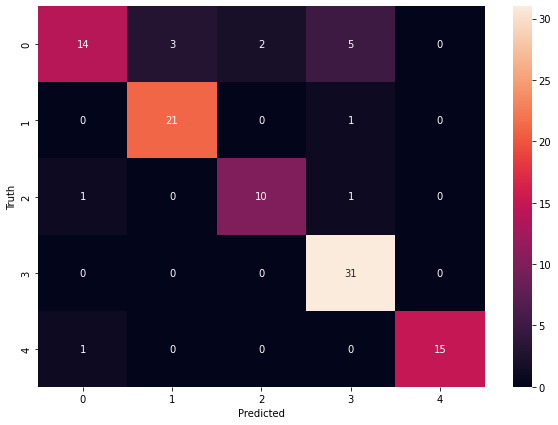

In [93]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
best_clf.predict("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cedric\\08.jpg")

In [94]:
import pickle

In [95]:
pickle.dump(best_clf, open('identification_model.pkl', 'wb'))

In [ ]:
for character_name, training_files in character_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[character_name])   

In [ ]:
# char_name='cedric'
# entry='01.jpg'
cropped_image = get_cropped("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\hermione\\afa7d40c49ab710c8951669e07f452ec.jpg")
# cropped_image = get_cropped('students_data'+'\\\\'+char_name+'\\\\'+entry)
plt.imshow(cropped_image)

In [142]:
type("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cedric\\08.jpg")

str

In [ ]:
# img=cv2.imread("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cedric\\08.jpg")
img=get_cropped("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cedric\\08.jpg")
scalled_raw_img = cv2.resize(img, (32, 32))
img_har = w2d(img,'db1',5)
scalled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
len_image_array = 32*32*3 + 32*32
final = combined_img.reshape(1,len_image_array).astype(float)


In [121]:
img=cv2.imread("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\draco\\05.jpg")

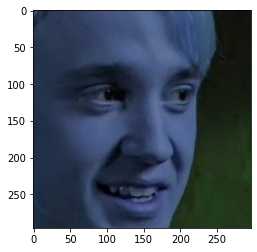

In [124]:
plt.imshow(img)

In [125]:
imgs=get_cropped("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\draco\\05.jpg")

In [133]:

img=get_cropped("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\hermione\\06.jpg")
scalled_raw_img = cv2.resize(img, (32, 32))
img_har = w2d(img,'db1',5)
scalled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
len_image_array = 32*32*3 + 32*32
final = combined_img.reshape(1,len_image_array).astype(float)


In [138]:
class_list=['cedric', 'draco', 'harry', 'hermione', 'ron']

In [139]:
class_list[0]

'cedric'

In [140]:
def classify_img(link):
    img=get_cropped(link)
    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img,'db1',5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    len_image_array = 32*32*3 + 32*32
    final = combined_img.reshape(1,len_image_array).astype(float)
    result=best_clf.predict(final)[0]
    pred=class_list[result]
    return pred

In [141]:
classify_img("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\hermione\\06.jpg")

'hermione'

In [134]:
best_clf.predict(final)[0]

3

In [ ]:
classify_image("D:\\Coding\\projects\\DeepLearning\\ID_system\\image_identi\\students_data\\cedric\\08.jpg")